(-10.0, 200.0)

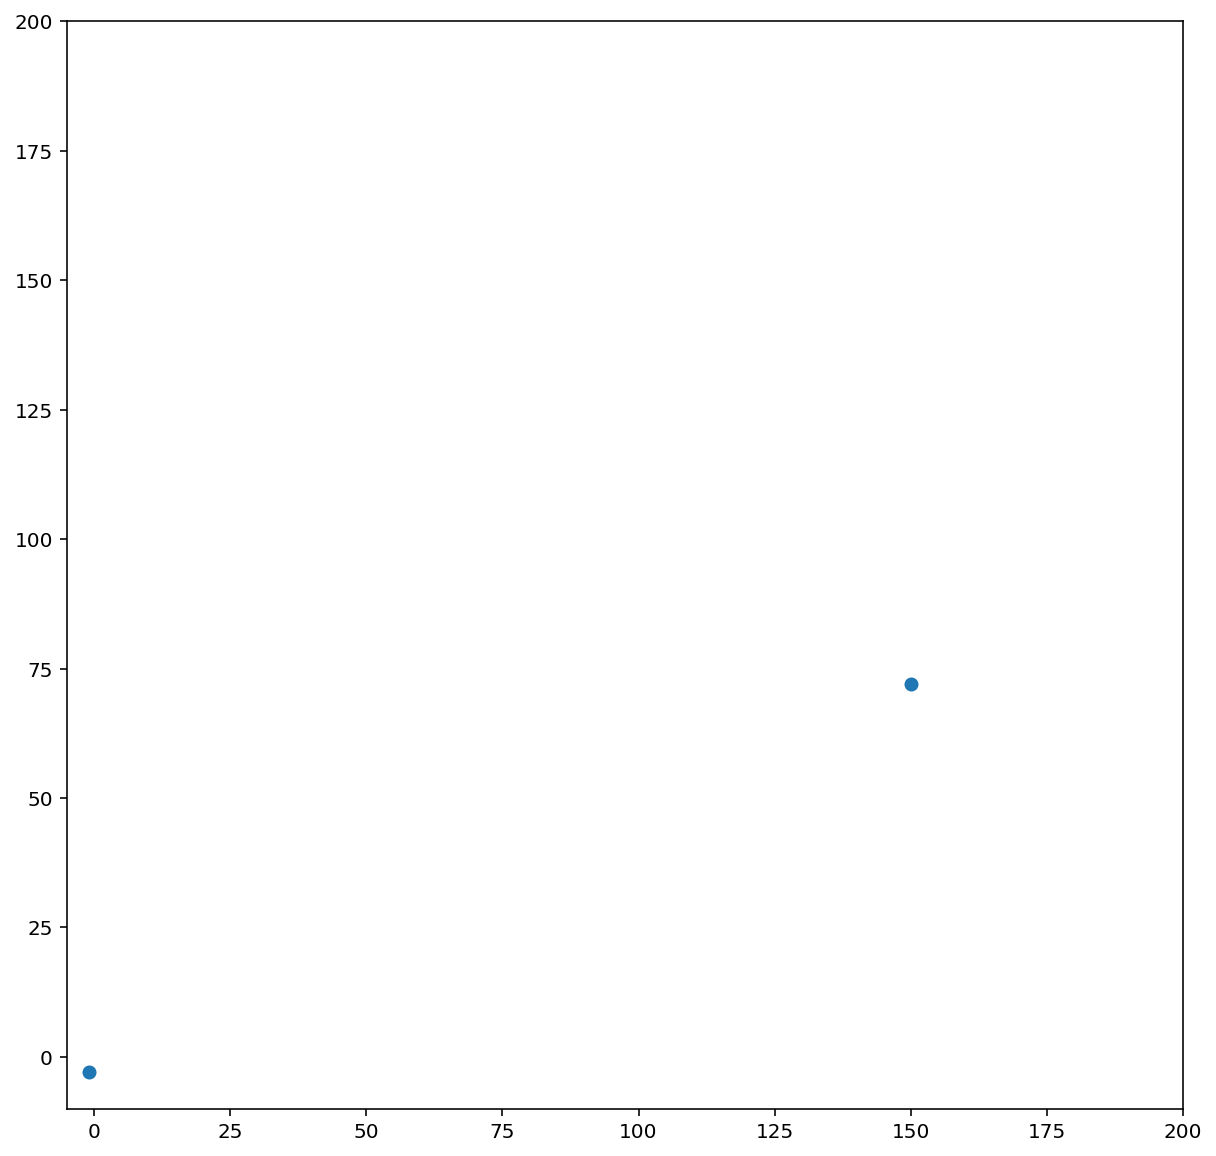

In [16]:
import matplotlib.pyplot as plt
x = [-1, 150]
y = [-3, 72]
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlim(-5, 200)
plt.ylim(-10, 200)

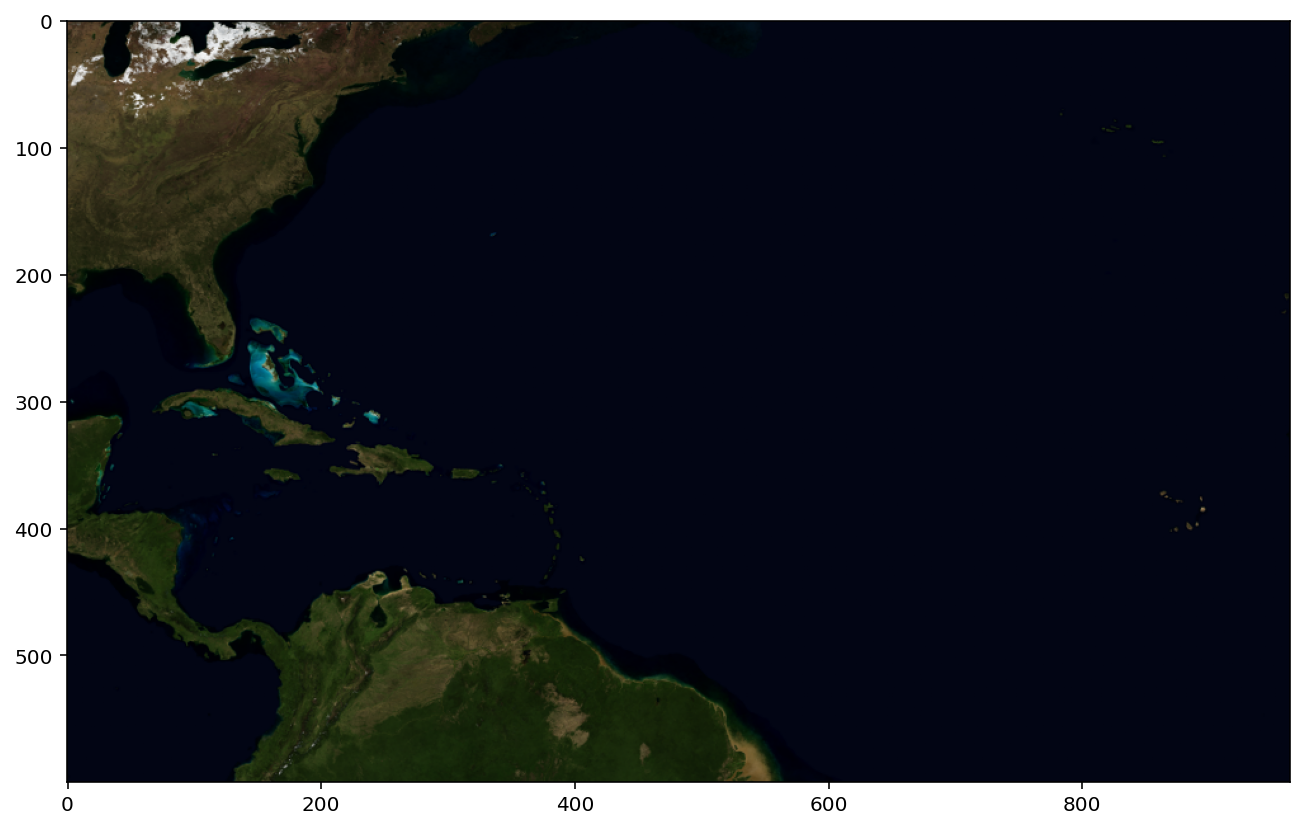

In [3]:
import matplotlib.image as mpi

img = mpi.imread('atlantic-basin.png')
plt.imshow(img)

In [4]:
# latitude/longitude co-ordinates of edges of map
left = -90
right = -17.06
bottom = 0
top = 45

# dimensions of image in pixels
width = 964
height = 600

# lat/long of New York
lat_NY = 40.7
long_NY = -74.0

# Convert from lat/long to pixel coordinates
x_NY = (long_NY - left)*width/(right-left)
y_NY = (height*(1 - (lat_NY - bottom)/(top-bottom)))

# Print the pixel co-ordinates of New York
print("NY x pos:", x_NY)
print("NY y pos:", y_NY)

NY x pos: 211.46147518508363
NY y pos: 57.3333333333333


Text(211.46147518508363, 57.3333333333333, 'New York')

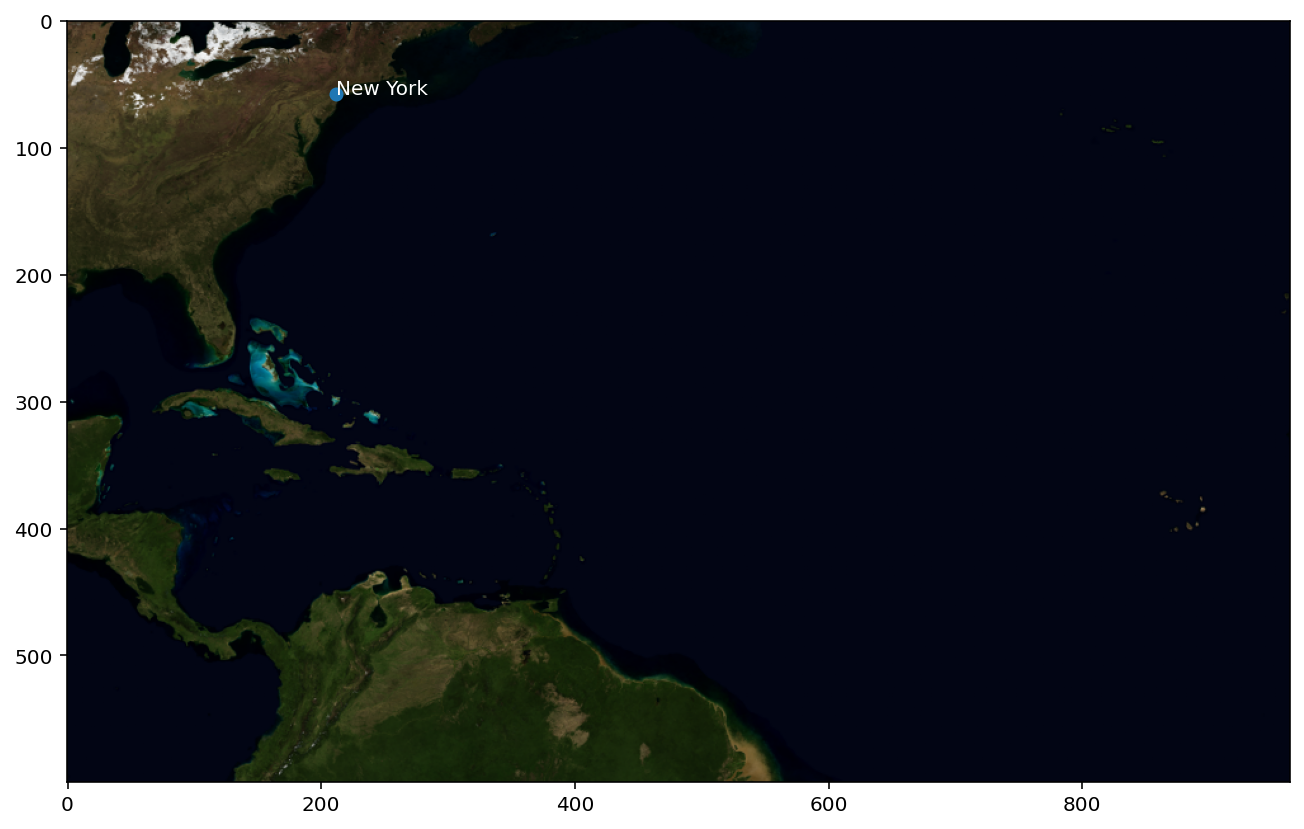

In [5]:
plt.imshow(img)
plt.scatter(x_NY, y_NY)
plt.text(x_NY, y_NY, "New York", color="white")

In [20]:
import csv # load the code library for reading CSV files

x = []
y = []

# Open the data file
with open("irma.csv") as f:
    reader = csv.reader(f)
    # skip the first line of the file
    next(reader)
    for row in reader:
        latitude = float(row[2])
        longitude = float(row[3])

        # translate to pixel coordinates
        x.append((longitude - left)*width/(right-left))
        y.append(height*(1 - (latitude - bottom)/(top-bottom)))

print("x-coords:", x)
print("y-coords:", y)

IndexError: list index out of range

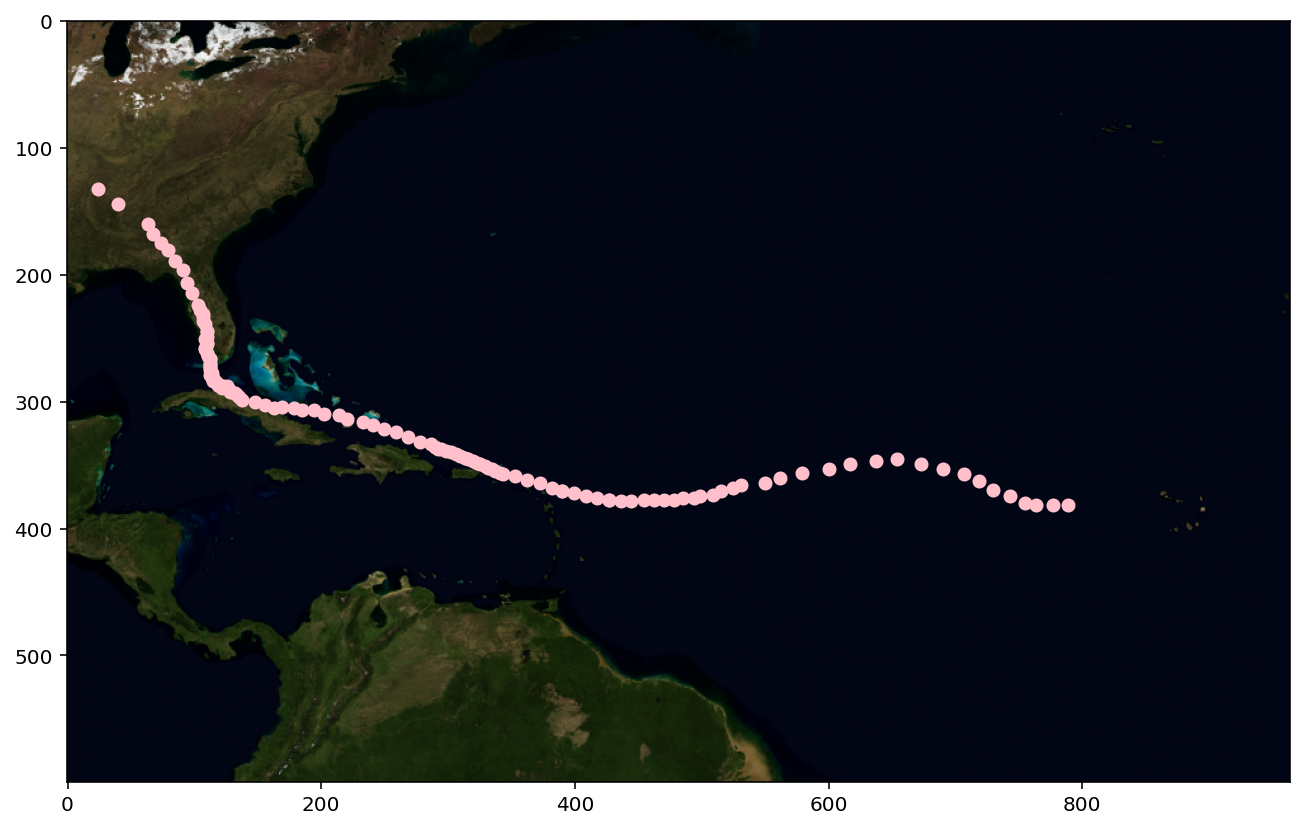

In [12]:
plt.imshow(img)
plt.scatter(x, y, color='pink')

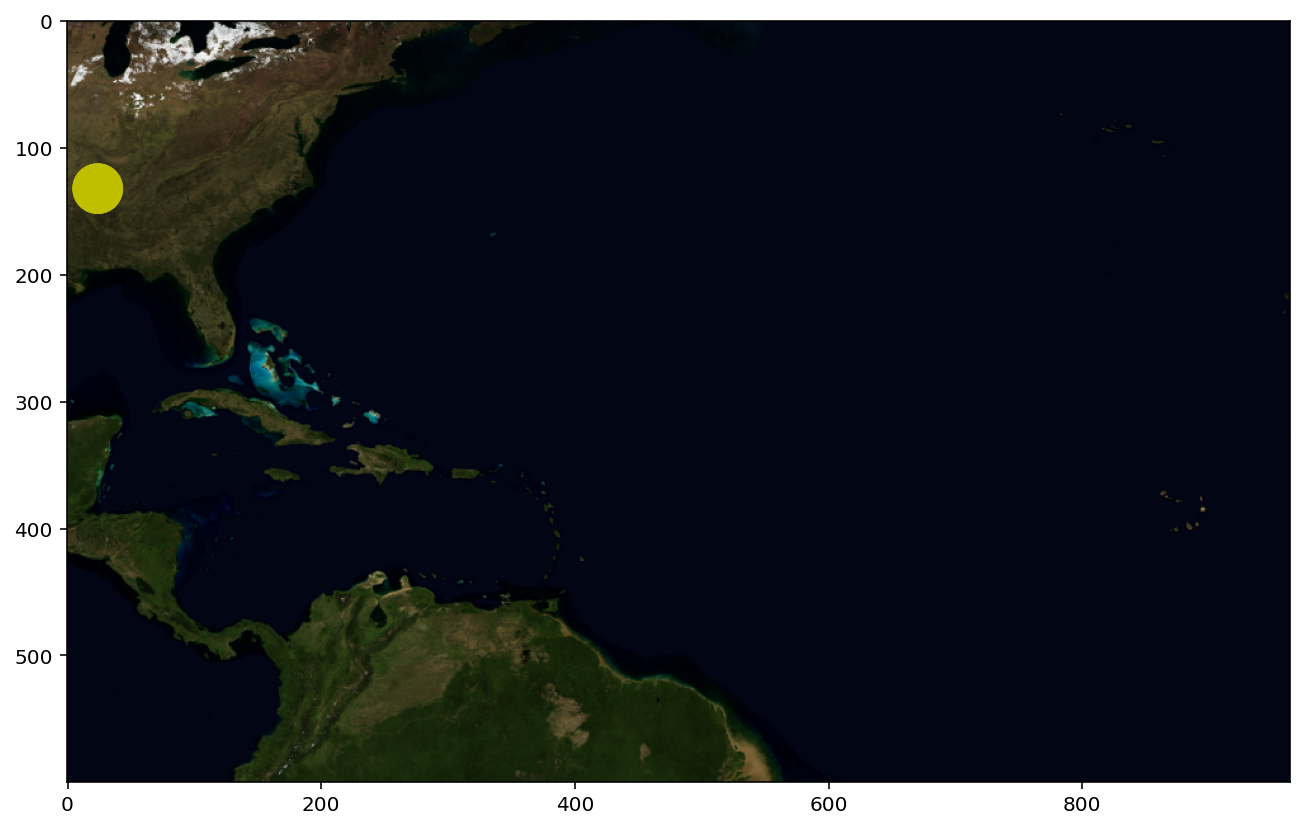

In [11]:
import matplotlib.animation as animation

fig = plt.figure()
ax = plt.axes()
patch = plt.Circle((0, 0), 20, fc='y')


def init():
    patch.center = (20, 20)
    ax.add_patch(patch)
    return patch,

def animate(i):
    patch.center = (x[i], y[i])
    return patch,

anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=len(x),
                               interval=20,
                               blit=True)

plt.imshow(img,zorder=0)
anim.save('hurricane_irma.mp4', writer = 'ffmpeg', fps=30)